# TEXT EMOTION DETECTION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### Loading the dataset

In [4]:
df = pd.read_csv("emotion_dataset_add.csv")

In [5]:
df.head()

Emotion                                               Text
0     worry                           where's my new @NylonMag
1       joy  Yeah! I found a pack of Orville Redenbacher's ...
2      fear  Journalists were asked by the manager to atten...
3      fear  Coming of the  The fire of God not only destro...
4  surprise  I slid gracefully. But my toe isn't going back...

In [6]:
df['Emotion'].value_counts()

Emotion
joy         11045
worry        7722
sadness      6722
fear         5410
anger        4297
surprise     4062
love         3842
neutral      2254
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

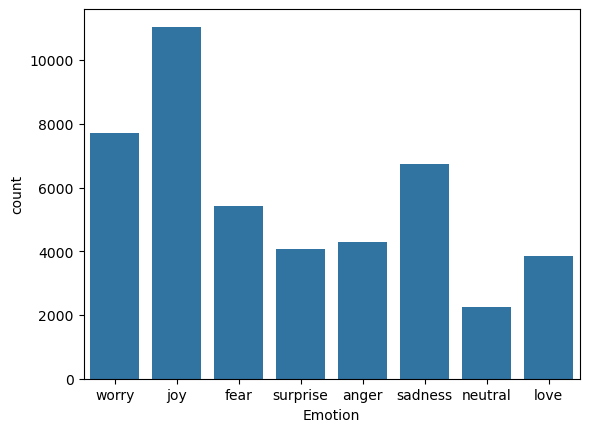

In [7]:
sns.countplot(x='Emotion',data=df)

### Data pre-processing

In [8]:
import neattext.functions as nfx

# Remove the user handles
df['Text'] = df['Text'].astype(str)
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)


In [9]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [10]:
# Remove the stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [11]:
df

Emotion                                               Text  \
0         worry                           where's my new @NylonMag   
1           joy  Yeah! I found a pack of Orville Redenbacher's ...   
2          fear  Journalists were asked by the manager to atten...   
3          fear  Coming of the  The fire of God not only destro...   
4      surprise  I slid gracefully. But my toe isn't going back...   
...         ...                                                ...   
45349  surprise  @ShesA_KEEPhER hahahaha i never said she was t...   
45350      fear  &quot;@RevRunWisdom: not afraid of tomorrow, f...   
45351      fear  And the of the #LORD fell on all the kingdoms ...   
45352   sadness  It was a pretty despondent group that sat arou...   
45353   neutral                                              92 .    

                                              Clean_Text  
0                                            where's new  
1      Yeah! found pack Orville Redenbacher's popcorn...  
2      Journalists asked manager attend midday confer...  
3      Coming fire God destroys man implants #God #Ho...  
4        slid gracefully. toe going place easily. #ouch!  
...                                                  ...  
45349  hahahaha said best lol freak weekend lol surprise  
45350  &quot; afraid tomorrow, seen yesterday love to...  
45351  #LORD fell kingdoms lands #Judah, war Jehoshap...  
45352  pretty despondent group sat fire LRDG patrol ,...  
45353                                               92 .  

[45354 rows x 3 columns]

### Splitting data into input variables and target variable

x: Features are the attributes and variables extracted from the dataset. These extracted features are used as inputs to the model during training.

y: Labels are the output or the target variable.

In [12]:
x = df['Clean_Text']
y = df['Emotion']

### Splitting data into train and test set

We need to split our dataset into a train set and test set. The model will learn from the train set. We will use the test set to evaluate the model performance and measure the model’s knowledge capability.

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Training the model

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

C:\Users\Predator\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5647828323656942

In [16]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.5530241787315352

In [17]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.4800470346145366

## Saving the model

In [18]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()